In [331]:
from src.utilities import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

In [332]:
ratings_df = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Book-Ratings.csv')
books_df = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Books.csv')
users_df = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Users.csv')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/

In [333]:
print('ratings_df: ', ratings_df.shape)
print('users_df: ', users_df.shape)
print('books_df: ', books_df.shape)

ratings_df:  (1149780, 3)
users_df:  (278858, 3)
books_df:  (271360, 8)


In [334]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [335]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [336]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [337]:
columns = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']
books_df.drop(columns=columns, inplace=True)

In [338]:
books_df.rename(columns={'Year-Of-Publication':'Publication-Year'},inplace=True)
books_df.drop(columns='Publisher',inplace=True)

In [339]:
books_ratings_df = pd.merge(ratings_df, books_df, on='ISBN')

In [340]:
print(books_ratings_df.shape)
print('===========================================================')
books_ratings_df.head()

(1031136, 6)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publication-Year
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002


In [341]:
books_ratings_df = books_ratings_df[books_ratings_df['Publication-Year'] != 'Gallimard']
books_ratings_df = books_ratings_df[books_ratings_df['Publication-Year'] != 'DK Publishing Inc']

In [342]:
books_ratings_df['Publication-Year'] = books_ratings_df['Publication-Year'].apply(lambda x: int(x))

In [343]:
books_ratings_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publication-Year
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002


In [344]:
# Average ratings and number of ratings (or ratings count)
average_count_rating = pd.DataFrame(books_ratings_df.groupby('ISBN')['Book-Rating'].mean())

In [345]:
average_count_rating['Rating-Count'] = pd.DataFrame(books_ratings_df.groupby('ISBN')['Book-Rating'].count())

In [346]:
average_count_rating.rename(columns={'Book-Rating':'Average-Rating'},inplace=True)

In [347]:
print(average_count_rating.shape)
print('')
print('============================')
print('average_count_rating :::::::')
print('============================')
average_count_rating.sort_values('Rating-Count', ascending=False).head()

(270148, 2)

average_count_rating :::::::


,Average-Rating,Rating-Count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



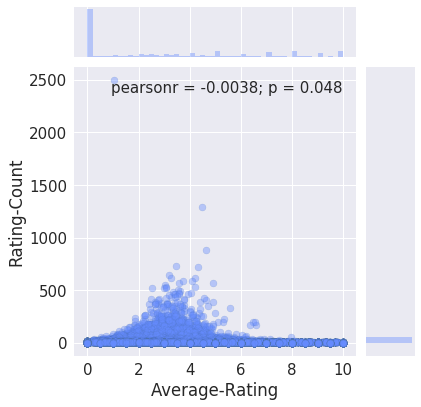

In [348]:
# Getting scatter plot between Average-Rating and Rating-Count
sns.set(font_scale=1.5, 
        rc={'figure.figsize':(12,7)}
       )
sns.set_style(style=None)
sns_plot = sns.jointplot(x = 'Average-Rating', y = 'Rating-Count', 
              alpha=0.4, edgecolor='b', 
              color='#668cff',
              data=average_count_rating)
plt.grid('off')
sns_plot.savefig('img/jointplot.jpg');

## Recommendations Based on Most Rated Books

In [349]:
# Step 1: Sort by Rating-Count
test10=average_count_rating.sort_values(by='Rating-Count', ascending=False).head(10)
test10

,Average-Rating,Rating-Count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
044023722X,3.187017,647
0142001740,4.219512,615
067976402X,3.255700,614
0671027360,3.718430,586


In [350]:
top_isbn=test10.index.to_list()
top_isbn

['0971880107',
 '0316666343',
 '0385504209',
 '0060928336',
 '0312195516',
 '044023722X',
 '0142001740',
 '067976402X',
 '0671027360',
 '0446672211']

In [351]:
most_rated = pd.DataFrame(top_isbn, index=np.arange(len(top_isbn)), columns=['ISBN'])
most_rated_books = pd.merge(most_rated, books_ratings_df, on='ISBN')

In [352]:
top_book_titles = most_rated_books['Book-Title'].value_counts().to_frame()
top_book_titles.rename(columns={'Book-Title':'Count'},inplace=True)
top_book_titles

,Count
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,883
Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
The Red Tent (Bestselling Backlist),723
A Painted House,647
The Secret Life of Bees,615
Snow Falling on Cedars,614
Angels &amp; Demons,586
Where the Heart Is (Oprah's Book Club (Paperback)),585


In [353]:
pd.Series(top_book_titles.index)

0                                          Wild Animus
1                            The Lovely Bones: A Novel
2                                    The Da Vinci Code
3      Divine Secrets of the Ya-Ya Sisterhood: A Novel
4                  The Red Tent (Bestselling Backlist)
5                                      A Painted House
6                              The Secret Life of Bees
7                               Snow Falling on Cedars
8                                  Angels &amp; Demons
9    Where the Heart Is (Oprah's Book Club (Paperba...
dtype: object

## Recommendations Based on Correlation (Pearson R)

In [354]:
print(average_count_rating.shape)
print('')
average_count_rating.head()

(270148, 2)



,Average-Rating,Rating-Count
ISBN,,
0000913154,8.0,1
0001010565,0.0,2
0001046438,9.0,1
0001046713,0.0,1
000104687X,6.0,1


In [355]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [356]:
counts1 = ratings_df['User-ID'].value_counts()
counts2 = ratings_df['Book-Rating'].value_counts()

In [357]:
# Filtering out ratings_df by publication year is not advisable
ratings = ratings_df[ratings_df['User-ID'].isin(counts1[counts1 >= 200].index)] 
print(ratings.shape)
print('')
ratings.head()

(527556, 3)



,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [358]:
ratings = ratings[ratings['Book-Rating'].isin(counts2[counts2 >= 100].index)]
print(ratings.shape)
print('')
ratings.head()

(527556, 3)



,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [359]:
book_matrix = pd.pivot_table(ratings, index='User-ID', columns='ISBN', values='Book-Rating')
print(book_matrix.shape)
print('')
book_matrix.head()

(905, 207699)



ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
ratings.sample(10)

,User-ID,ISBN,Book-Rating
1042597,249628,0671496174,10
120210,27617,0888626983,0
48035,11676,037329283X,0
365475,87746,0446611867,0
20800,4017,0316284955,0
1006517,241666,0553296604,0
48459,11676,0380751399,10
225063,52584,0373245734,0
238788,55492,0373151551,0
989915,238120,0446323802,0


In [361]:
user_rating = book_matrix['0316666343']
print(user_rating.shape)
print('')
user_rating.head()

(905,)



User-ID
254     NaN
2276    NaN
2766    9.0
2977    NaN
3363    0.0
Name: 0316666343, dtype: float64

In [362]:
similar_to_user_rating = book_matrix.corrwith(user_rating)
similar_to_user_rating.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning:

divide by zero encountered in double_scalars



ISBN
 0330299891   NaN
 0375404120   NaN
 0586045007   NaN
 9022906116   NaN
 9032803328   NaN
dtype: float64

In [363]:
correlated_books = pd.DataFrame(similar_to_user_rating, columns=['pearsonR'])
correlated_books.head()

,pearsonR
ISBN,
0330299891,NaN
0375404120,NaN
0586045007,NaN
9022906116,NaN
9032803328,NaN


In [364]:
correlated_books.dropna(inplace=True)

In [365]:
correlated_books.head()

,pearsonR
ISBN,
0002005018,9.614813e-18
0002184974,1.000000e+00
0002250810,1.000000e+00
000225929X,1.000000e+00
0006127754,-1.000000e+00


In [366]:
average_count_rating.head()

,Average-Rating,Rating-Count
ISBN,,
0000913154,8.0,1
0001010565,0.0,2
0001046438,9.0,1
0001046713,0.0,1
000104687X,6.0,1


In [367]:
correlation_summary = correlated_books.join(average_count_rating['Rating-Count'])

In [368]:
correlation_summary.head()

,pearsonR,Rating-Count
ISBN,,
0002005018,9.614813e-18,14.0
0002184974,1.000000e+00,2.0
0002250810,1.000000e+00,3.0
000225929X,1.000000e+00,4.0
0006127754,-1.000000e+00,NaN


In [369]:
correlation_summary[correlation_summary['Rating-Count'] >= 300].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,Rating-Count
ISBN,,
0316666343,1.000000,1295.0
0312291639,0.471872,354.0
0316601950,0.434248,568.0
0446610038,0.429712,391.0
0446672211,0.421478,585.0
0385265700,0.351635,319.0
0345342968,0.316922,321.0
0060930535,0.309860,494.0
0375707972,0.308145,354.0


In [370]:
isbn_only = correlation_summary[correlation_summary['Rating-Count'] >= 300].sort_values('pearsonR', ascending=False).head(11)

In [371]:
isbn_list=isbn_only.index.tolist()[1:]

In [372]:
books_isbn = pd.DataFrame(isbn_list, index=np.arange(len(isbn_list)), columns=['ISBN'])
books_isbn

,ISBN
0,0312291639
1,0316601950
2,0446610038
3,0446672211
4,0385265700
5,0345342968
6,0060930535
7,0375707972
8,0684872153
9,0671021001


In [373]:
correlated_book_titles=pd.merge(books_isbn, books_df, on='ISBN')

In [374]:
correlated_book_titles

,ISBN,Book-Title,Book-Author,Publication-Year
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999
2,0446610038,1st to Die: A Novel,James Patterson,2002
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999
7,0375707972,The Reader,Bernhard Schlink,1999
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999
9,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998


## Matrix Factorization

In [375]:
!pip install scikit-surprise

In [376]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (20.0.2)


In [377]:
!pip install plotly==4.5.2

# Surprise Package

In [378]:
import surprise
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise import BaselineOnly, SVD, NMF, KNNBasic, KNNBaseline, KNNWithMeans, NormalPredictor
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from collections import defaultdict

### Merging users_df and ratings_df: Trimming Down

In [379]:
df = pd.merge(users_df, ratings_df, on='User-ID', how='inner')

In [380]:
print(df.shape)
print('')
df.head()

(1149780, 5)



,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [381]:
columns=['Location', 'Age']
df.drop(columns=columns,inplace=True)
df.head()

,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


In [382]:
print(df.shape)
print('')
df.iloc[::200000,:]

(1149780, 3)



,User-ID,ISBN,Book-Rating
0,2,0195153448,0
200000,48494,0871233428,0
400000,98391,0670032549,10
600000,147513,0470832525,5
800000,196502,0590431862,0
1000000,242157,0732275865,0


In [383]:
df.head()

,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


## Trimming down dataset

In [384]:
min_book_ratings = 50 # Books: At least 50 ratings received
min_user_ratings = 50 # Users: At least 50 ratings given

In [385]:
filter_books = df['ISBN'].value_counts() > min_book_ratings

In [386]:
filter_books.shape

(340556,)

In [387]:
filter_books = filter_books[filter_books].index.tolist()

In [388]:
len(filter_books)

2125

In [389]:
filter_users = df['User-ID'].value_counts() > min_user_ratings

In [390]:
filter_users.shape

(105283,)

In [391]:
filter_users = filter_users[filter_users].index.tolist()

In [392]:
len(filter_users)

3371

In [393]:
filtered_df = df[(df['ISBN'].isin(filter_books)) & (df['User-ID'].isin(filter_users))]

In [394]:
filtered_df.shape

(140516, 3)

In [395]:
print(type(filtered_df['Book-Rating'].iloc[20]))

filtered_df.head()

<class 'numpy.int64'>


,User-ID,ISBN,Book-Rating
394,243,0060915544,10
395,243,0060977493,7
397,243,0156006529,0
400,243,0316096199,0
401,243,0316601950,9


In [396]:
df.shape

(1149780, 3)

## Begin Model

In [397]:
reader = Reader(rating_scale=(0,10))
data = Dataset.load_from_df(filtered_df, reader)

In [398]:
# NMF()
algorithm = [BaselineOnly(), SVD(), KNNBasic(), KNNBaseline(), KNNWithMeans(), NormalPredictor()]

In [399]:
# Test algorithm
algo = SVD()
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

{'test_rmse': array([3.55940534, 3.56945669, 3.55890974, 3.56228142, 3.56326865]),
 'fit_time': (4.590898036956787,
  4.623157262802124,
  4.639545202255249,
  4.566792964935303,
  4.584981918334961),
 'test_time': (0.1421349048614502,
  0.14369988441467285,
  0.41222071647644043,
  0.14378929138183594,
  0.14405107498168945)}

In [400]:
comparison_list = []

for algo in algorithm:
    # Perform cross validation
    results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Append to comparison list
    get_result = pd.DataFrame.from_dict(results).mean(axis=0)
    get_result = get_result.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    comparison_list.append(get_result)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [401]:
comparison_list

[test_rmse         3.36514
 fit_time         0.197226
 test_time        0.195659
 Algorithm    BaselineOnly
 dtype: object, test_rmse     3.55824
 fit_time      4.57583
 test_time    0.143405
 Algorithm         SVD
 dtype: object, test_rmse     3.68009
 fit_time     0.699761
 test_time     2.29547
 Algorithm    KNNBasic
 dtype: object, test_rmse        3.46026
 fit_time        0.863127
 test_time        2.78323
 Algorithm    KNNBaseline
 dtype: object, test_rmse         3.46226
 fit_time         0.735402
 test_time         2.34359
 Algorithm    KNNWithMeans
 dtype: object, test_rmse            4.71186
 fit_time            0.125666
 test_time           0.240664
 Algorithm    NormalPredictor
 dtype: object]

In [402]:
surprise_results = pd.DataFrame(comparison_list).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,3.365142,0.197226,0.195659
KNNBaseline,3.460256,0.863127,2.783228
KNNWithMeans,3.462264,0.735402,2.343587
SVD,3.558244,4.575825,0.143405
KNNBasic,3.680094,0.699761,2.295471
NormalPredictor,4.711857,0.125666,0.240664


In [403]:
print('Using ALS : Alternating Least Squares')
baseline_only = {'method':'als', 'n_epochs':5, 'regu_u': 12, 'reg_i':5}
algo = BaselineOnly(bsl_options=baseline_only)
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

Using ALS : Alternating Least Squares
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([3.36954852, 3.34739381, 3.38224756, 3.37661566, 3.37676779]),
 'fit_time': (0.09795594215393066,
  0.12836718559265137,
  0.1306149959564209,
  0.12896347045898438,
  0.13027501106262207),
 'test_time': (0.10495448112487793,
  0.1056513786315918,
  0.40160155296325684,
  0.10549592971801758,
  0.10541057586669922)}

In [404]:
trainset, testset = train_test_split(data, test_size=0.20)
algo = BaselineOnly(bsl_options=baseline_only)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 3.3856


3.385551025645261

In [405]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

In [406]:
df_pred = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [407]:
df_pred.head()

,uid,iid,rui,est,details
0,62895,0316693251,8.0,0.892263,{'was_impossible': False}
1,223154,0786868716,8.0,3.666376,{'was_impossible': False}
2,200226,0380973545,0.0,3.058696,{'was_impossible': False}
3,205473,0425178102,0.0,0.862376,{'was_impossible': False}
4,244286,0684801469,0.0,2.730015,{'was_impossible': False}


In [408]:
df_pred['Iu']=df_pred['uid'].apply(get_Iu)
df_pred['Ui']=df_pred['iid'].apply(get_Ui)
df_pred['err']=abs(df_pred.est - df_pred.rui)

In [409]:
print(df_pred.shape)
print('')
df_pred.head()

(28104, 8)



,uid,iid,rui,est,details,Iu,Ui,err
0,62895,0316693251,8.0,0.892263,{'was_impossible': False},61,39,7.107737
1,223154,0786868716,8.0,3.666376,{'was_impossible': False},69,158,4.333624
2,200226,0380973545,0.0,3.058696,{'was_impossible': False},227,32,3.058696
3,205473,0425178102,0.0,0.862376,{'was_impossible': False},57,43,0.862376
4,244286,0684801469,0.0,2.730015,{'was_impossible': False},13,26,2.730015


In [410]:
best_predictions = df_pred.sort_values(by='err')[:20]
worst_predictions = df_pred.sort_values(by='err')[-20:]

In [411]:
df_full_pred = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details',])
df_full_pred['Iu']=df_full_pred['uid'].apply(get_Iu)
df_full_pred['Ui']=df_full_pred['iid'].apply(get_Ui)
df_full_pred['err']=abs(df_full_pred.est - df_full_pred.rui)

In [412]:
print(df_full_pred.shape)
print('')
df_full_pred.head()

(28104, 8)



,uid,iid,rui,est,details,Iu,Ui,err
0,62895,0316693251,8.0,0.892263,{'was_impossible': False},61,39,7.107737
1,223154,0786868716,8.0,3.666376,{'was_impossible': False},69,158,4.333624
2,200226,0380973545,0.0,3.058696,{'was_impossible': False},227,32,3.058696
3,205473,0425178102,0.0,0.862376,{'was_impossible': False},57,43,0.862376
4,244286,0684801469,0.0,2.730015,{'was_impossible': False},13,26,2.730015


In [413]:
df_full_pred.rename(columns={'iid':'ISBN'},inplace=True)
full_pred = pd.merge(df_full_pred, books_df, on='ISBN')

In [414]:
full_pred.sort_values(by='err', ascending=True, inplace=True)

In [415]:
print(full_pred.shape)
print('')
full_pred.head()

(27871, 11)



,uid,ISBN,rui,est,details,Iu,Ui,err,Book-Title,Book-Author,Publication-Year
17988,200674,0425173534,0.0,0.0,{'was_impossible': False},157,35,0.0,Ssn,Tom Clancy,2000
3837,235842,0440224624,0.0,0.0,{'was_impossible': False},100,85,0.0,The Loop,Nicholas Evans,1999
8723,238781,0553285785,0.0,0.0,{'was_impossible': False},185,45,0.0,Public Secrets,Nora Roberts,1990
13073,36836,0385234104,0.0,0.0,{'was_impossible': False},175,34,0.0,Fatherhood,Bill Cosby,1986
7595,124942,0553572210,0.0,0.0,{'was_impossible': False},192,54,0.0,Silent Treatment,Michael Palmer,1996


In [416]:
full_pred[full_pred['err'] == 0].sort_values(by='Ui', ascending=False).head(60)

,uid,ISBN,rui,est,details,Iu,Ui,err,Book-Title,Book-Author,Publication-Year
5664,269719,0971880107,0.0,0.0,{'was_impossible': False},112,669,0.0,Wild Animus,Rich Shapero,2004
5745,144531,0971880107,0.0,0.0,{'was_impossible': False},157,669,0.0,Wild Animus,Rich Shapero,2004
5728,277478,0971880107,0.0,0.0,{'was_impossible': False},20,669,0.0,Wild Animus,Rich Shapero,2004
5730,242824,0971880107,0.0,0.0,{'was_impossible': False},121,669,0.0,Wild Animus,Rich Shapero,2004
5796,59150,0971880107,0.0,0.0,{'was_impossible': False},62,669,0.0,Wild Animus,Rich Shapero,2004
5794,77809,0971880107,0.0,0.0,{'was_impossible': False},86,669,0.0,Wild Animus,Rich Shapero,2004
5793,186039,0971880107,0.0,0.0,{'was_impossible': False},16,669,0.0,Wild Animus,Rich Shapero,2004
5792,226006,0971880107,0.0,0.0,{'was_impossible': False},14,669,0.0,Wild Animus,Rich Shapero,2004
5821,60809,0971880107,0.0,0.0,{'was_impossible': False},5,669,0.0,Wild Animus,Rich Shapero,2004
5741,155147,0971880107,0.0,0.0,{'was_impossible': False},91,669,0.0,Wild Animus,Rich Shapero,2004


In [417]:
best_predictions.rename(columns={'iid':'ISBN'}, inplace=True)

In [418]:
worst_predictions.rename(columns={'iid':'ISBN'},inplace=True)

In [419]:
best_pred = pd.merge(best_predictions, books_df, on='ISBN')

In [420]:
best_pred.drop(columns=['details'],inplace=True)
best_pred

,uid,ISBN,rui,est,Iu,Ui,err,Book-Title,Book-Author,Publication-Year
0,102967,0425180964,0.0,0.0,417,49,0.0,The Bear and the Dragon (Jack Ryan Novels),Tom Clancy,2001
1,234623,080410946X,0.0,0.0,271,40,0.0,Object Lessons,Anna Quindlen,1992
2,198711,042510687X,0.0,0.0,380,59,0.0,Outbreak,Robin Cook,1991
3,189334,0743225724,0.0,0.0,102,24,0.0,Good Harbor: A Novel,Anita Diamant,2002
4,217375,0425185710,0.0,0.0,257,37,0.0,Valhalla Rising (Dirk Pitt Adventures (Paperba...,Clive Cussler,2002
5,262399,0446802204,0.0,0.0,180,30,0.0,Master of the Game,Sidney Sheldon,1983
6,76352,0425125467,0.0,0.0,540,36,0.0,Harmful Intent,Robin Cook,2001
7,98741,0515135739,0.0,0.0,252,41,0.0,Eleventh Hour: An FBI Thriller (FBI Thriller (...,Catherine Coulter,2004
8,76352,0446363669,0.0,0.0,540,32,0.0,The Doomsday Conspiracy,Sidney Sheldon,1992
9,127429,0316899984,0.0,0.0,125,91,0.0,"River, Cross My Heart",Breena Clarke,1999


In [421]:
worst_pred = pd.merge(worst_predictions, books_df, on='ISBN')

In [422]:
worst_pred.drop('details',1,inplace=True)
worst_pred

,uid,ISBN,rui,est,Iu,Ui,err,Book-Title,Book-Author,Publication-Year
0,266226,0156711427,10.0,0.507922,148,32,9.492078,A Passage to India,E.M. Forster,1965
1,14521,0553275976,10.0,0.507431,183,97,9.492569,The Bonfire of the Vanities,Tom Wolfe,1988
2,35859,0842342702,10.0,0.498556,595,43,9.501444,Left Behind: A Novel of the Earth's Last Days ...,Tim Lahaye,2000
3,77940,0671027581,10.0,0.461579,61,41,9.538421,Open Season,Linda Howard,2002
4,200674,0553576925,10.0,0.459466,157,39,9.540534,Hiding in the Shadows (Shadows Trilogy (Paperb...,Kay Hooper,2000
5,161752,1551668912,10.0,0.447616,64,36,9.552384,Thursday'S At Eight,Debbie Macomber,2002
6,166123,0449221504,10.0,0.376368,197,102,9.623632,K Is for Killer (Kinsey Millhone Mysteries (Pa...,Sue Grafton,1999
7,245864,0345409876,10.0,0.374258,29,28,9.625742,Women Who Run with the Wolves,CLARISSA PINKOLA PHD ESTES,1996
8,217375,0446364193,10.0,0.360801,257,148,9.639199,Along Came a Spider (Alex Cross Novels),James Patterson,1993
9,69232,0440224810,10.0,0.273466,159,34,9.726534,Special Delivery: A Novel,Danielle Steel,1998
